## ```logistic Regression```

#### this is used for classification of data in one form e.g. win/loss, etc.
#### this used for probability.
#### it's outcome is binary.

difference between linea regression and logistic regression

parameter     |   linear        | logistic

intercept     |   y = mx + c    |   y = 1 / (1 + e^(-z))

slope         |   y = mx + c    |   y = 1 / (1 + e^(-z))

output        |   continuous    |   0 or 1

function      |   y = mx + c    |   y = 1 / (1 + e^(-z)) or sigmoid

goal          |   predict value |   predict 0 or 1(probability)


🔹 Log Loss kya batata hai?
Log Loss batata hai ki model ki predicted probabilities kitni confident aur accurate hain.
Agar model wrong prediction karta hai with high confidence, to uska log loss zyada hoga.
Agar correct prediction karta hai with high confidence, to log loss kam hoga.

🔹 Log Loss ka Formula (Binary Classification ke liye)
For a single data point:

LogLoss=−[𝑦⋅log(𝑝)+(1−𝑦)⋅log(1−𝑝)]
LogLoss=−[y⋅log(p)+(1−y)⋅log(1−p)]
Where:

y = actual label (0 ya 1)

p = predicted probability of class 1

Agar aapke paas n samples hain, to average log loss:

LogLoss=−1𝑛∑𝑖=1𝑛[𝑦𝑖⋅log(𝑝𝑖)+(1−𝑦𝑖)⋅log(1−𝑝𝑖)]
LogLoss=−n1i=1∑n [yi⋅log(pi )+(1−yi)⋅log(1−pi)]

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [48]:
df=pd.read_csv("cust_satisfaction.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      103904 non-null  object 
 1   Customer Type               103904 non-null  object 
 2   Type of Travel              103904 non-null  object 
 3   Class                       103904 non-null  object 
 4   satisfaction                103904 non-null  object 
 5   Age                         103904 non-null  int64  
 6   Flight Distance             103904 non-null  int64  
 7   Inflight entertainment      103904 non-null  int64  
 8   Baggage handling            103904 non-null  int64  
 9   Cleanliness                 103904 non-null  int64  
 10  Departure Delay in Minutes  103904 non-null  int64  
 11  Arrival Delay in Minutes    103594 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 9.5+ MB


,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0


In [49]:
df.duplicated()
df.duplicated().sum()

np.int64(172)

In [50]:
df.drop_duplicates(inplace=True)

In [51]:
df.duplicated().sum()

np.int64(0)

In [52]:
df.isnull().sum()

Gender                          0
Customer Type                   0
Type of Travel                  0
Class                           0
satisfaction                    0
Age                             0
Flight Distance                 0
Inflight entertainment          0
Baggage handling                0
Cleanliness                     0
Departure Delay in Minutes      0
Arrival Delay in Minutes      310
dtype: int64

In [53]:
df.dropna(inplace=True)
df.isnull().sum()

Gender                        0
Customer Type                 0
Type of Travel                0
Class                         0
satisfaction                  0
Age                           0
Flight Distance               0
Inflight entertainment        0
Baggage handling              0
Cleanliness                   0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
dtype: int64

In [54]:
df['Customer Type'].value_counts()

Customer Type
Loyal Customer       84517
disloyal Customer    18905
Name: count, dtype: int64

In [55]:
loyal_customer=df[df['Customer Type']=='Loyal Customer']
disloyal_customer=df[df['Customer Type']=='disloyal Customer']

In [56]:
loyal_customer = loyal_customer.sample(20000)
loyal_customer.shape

(20000, 12)

In [57]:
balance_df=pd.concat([loyal_customer,disloyal_customer],axis=0)
balance_df.shape

(38905, 12)

In [58]:
cat_col=balance_df.select_dtypes(include='object')
cat_col.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction
64631,Female,Loyal Customer,Business travel,Business,satisfied
92762,Female,Loyal Customer,Personal Travel,Eco,satisfied
64720,Male,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
95340,Male,Loyal Customer,Business travel,Business,satisfied
84369,Female,Loyal Customer,Business travel,Eco,neutral or dissatisfied


In [59]:
#cat_col=cat_col.drop([])

In [60]:
num_col=balance_df.select_dtypes(exclude=["object"])
num_col.head()

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
64631,52,4983,3,5,3,16,0.0
92762,55,1747,1,4,4,33,3.0
64720,62,585,3,4,3,39,32.0
95340,31,544,5,5,5,0,0.0
84369,39,2342,2,2,2,19,12.0


In [61]:
#encoding if objects
# dt={
#     "Male":0,
#     "Female":1
# }
# cat_col['Gender']=cat_col['Gender'].map(dt)
# cat_col['Gender']

In [62]:
# dt1={
#     "Loyal Customer":0,
#     "disloyal Customer":1
# }
# cat_col['Customer Type']=cat_col['Customer Type'].map(dt1)
# cat_col['Customer Type']

In [63]:
# dt2={
#     "satisfied":0,
#     "neutral or dissatisfied":1
# }
# cat_col['satisfaction']=cat_col['satisfaction'].map(dt2)
# cat_col['satisfaction']

In [64]:
# dt3={
    
#     "Personal Travel":0,
#     "Business travel":1
# }
# cat_col["Type of Travel"]=cat_col["Type of Travel"].map(dt3)
# cat_col.head()

In [65]:
# dt4={
    
#     "Eco Plus":0,
#     "Business":1
# }
# cat_col["Class"]=cat_col["Class"].map(dt4)
# cat_col.head()

In [66]:
# 0-1 encoding
#pd.get_dummies(cat_col,drop_first=True).astype(int).head()

In [67]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

ohe=OneHotEncoder(drop='if_binary')
cat_cal_encoded=ohe.fit_transform(cat_col).toarray()
cat_cal_encoded

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 1.],
       [1., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]], shape=(38905, 7))

In [68]:
column_names=list(ohe.get_feature_names_out())
column_names

['Gender_Male',
 'Customer Type_disloyal Customer',
 'Type of Travel_Personal Travel',
 'Class_Business',
 'Class_Eco',
 'Class_Eco Plus',
 'satisfaction_satisfied']

In [69]:
one_hot=pd.DataFrame(cat_cal_encoded,columns=column_names)
one_hot.head()


,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [70]:
one_hot=one_hot.reset_index(drop=True)# to prevent from giving null values after concating 
num_col=num_col.reset_index(drop=True)

In [71]:
final_df=pd.concat([num_col,one_hot],axis=1)
final_df.head()

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,52,4983,3,5,3,16,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,55,1747,1,4,4,33,3.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,62,585,3,4,3,39,32.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,31,544,5,5,5,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,39,2342,2,2,2,19,12.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [72]:
matrix=final_df.corr()
matrix

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied
Age,1.000000,0.128271,0.075772,-0.047709,0.056578,-0.002820,-0.005142,0.009831,-0.383128,0.085455,0.164885,-0.174511,0.022394,0.121954
Flight Distance,0.128271,1.000000,0.119353,0.046180,0.087926,-0.004617,-0.008980,0.007875,-0.329388,-0.122278,0.373428,-0.332039,-0.081556,0.277635
Inflight entertainment,0.075772,0.119353,1.000000,0.245817,0.793463,-0.022422,-0.025428,0.005026,-0.139442,-0.066928,0.138639,-0.128282,-0.019794,0.279343
Baggage handling,-0.047709,0.046180,0.245817,1.000000,0.054423,-0.014502,-0.018581,0.030920,0.030380,-0.035897,0.239963,-0.205844,-0.068157,0.228468
Cleanliness,0.056578,0.087926,0.793463,0.054423,1.000000,-0.003528,-0.003656,0.005602,-0.103843,-0.020262,0.090261,-0.082044,-0.015972,0.206884
Departure Delay in Minutes,-0.002820,-0.004617,-0.022422,-0.014502,-0.003528,1.000000,0.965412,0.008176,0.005015,-0.002331,-0.020702,0.019504,0.002227,-0.050088
Arrival Delay in Minutes,-0.005142,-0.008980,-0.025428,-0.018581,-0.003656,0.965412,1.000000,0.005566,0.006573,-0.004661,-0.025260,0.022182,0.006099,-0.056883
Gender_Male,0.009831,0.007875,0.005026,0.030920,0.005602,0.008176,0.005566,1.000000,-0.040887,0.012086,0.023339,-0.010920,-0.025679,0.026783
Customer Type_disloyal Customer,-0.383128,-0.329388,-0.139442,0.030380,-0.103843,0.005015,0.006573,-0.040887,1.000000,-0.465844,-0.108292,0.152357,-0.093715,-0.248470
Type of Travel_Personal Travel,0.085455,-0.122278,-0.066928,-0.035897,-0.020262,-0.002331,-0.004661,0.012086,-0.465844,1.000000,-0.381326,0.324735,0.113271,-0.271977


<Axes: >

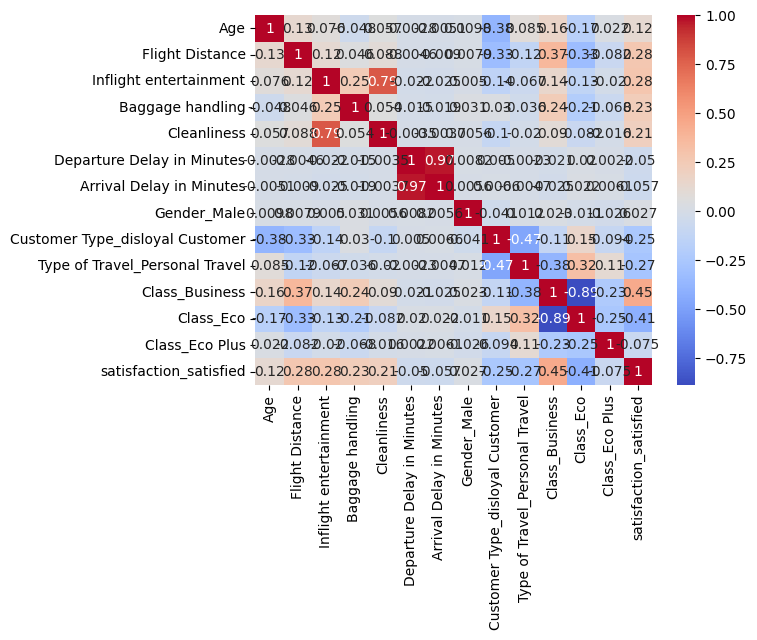

In [73]:
sns.heatmap(matrix,annot=True,cmap="coolwarm")


In [74]:
x=final_df.drop("satisfaction_satisfied",axis=1)
y=final_df["satisfaction_satisfied"]

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [76]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [77]:
model.score(x_test,y_test)

0.766868011823673

In [78]:
model.score(x_train,y_train)

0.7660005140727413

In [79]:
y_pred=model.predict(x_test)
y_pred

array([0., 0., 1., ..., 0., 0., 0.], shape=(7781,))

In [80]:
d1=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
d1

,Actual,Predicted
18536,0.0,0.0
36240,0.0,0.0
5426,1.0,1.0
21679,1.0,0.0
18714,1.0,1.0
...,...,...
23667,0.0,0.0
9774,0.0,0.0
24880,0.0,0.0
38451,1.0,0.0


In [81]:
print(y_test.value_counts())

satisfaction_satisfied
0.0    4973
1.0    2808
Name: count, dtype: int64


In [82]:
y_pred = (model.predict_proba(x_test)[:, 1] > 0.5).astype(int)
y_pred

array([0, 0, 1, ..., 0, 0, 0], shape=(7781,))

In [83]:
from sklearn import metrics
from sklearn.metrics import classification_report


### ```Confusion Matrix```	

	Predicted: Yes	Predicted: No
Actual: Yes (1)	|  True Positive (TP)	|  False Negative (FN)


Actual: No (0)	|  False Positive (FP)	|  True Negative (TN)



TP (True Positive): Model correctly predicted Yes.

TN (True Negative): Model correctly predicted No.

FP (False Positive): Model predicted Yes, but it was actually No.

FN (False Negative): Model predicted No, but it was actually Yes.

the error which come due to fn is type 1 error

the error which come due to fp is type 2 error


[[4106  867]
 [ 947 1861]]


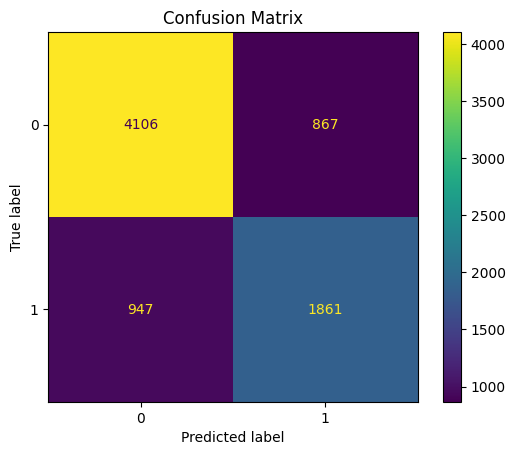

In [87]:
Actual=y_test
Predicted=y_pred
confusion_matrix = metrics.confusion_matrix(Actual, Predicted)
print(confusion_matrix) #confusion_matrix

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.title('Confusion Matrix')
plt.show()

✅ 1. Accuracy (सटीकता)
🔹 Meaning:
Accuracy batata hai ki kitne predictions sahi hue total predictions mein se.

Accuracy = (Sahi predictions) / (Total predictions)
         = (TP + TN) / (TP + TN + FP + FN)



✅ 2. Precision (सटीकता किसी एक class ke liye)
🔹 Meaning:
Precision batata hai ki jo bhi model ne positive (ya koi class) predict kiya, unmein se kitne actual mein sahi the.

Precision = TP / (TP + FP)




✅ 3. Recall (Sensitivity ya True Positive Rate)
🔹 Meaning:
Recall batata hai ki jitne actual positive the, unmein se model kitne dhoondh paya.

This means it looks at true positives and false negatives (which are positives that have been incorrectly predicted as negative).

Recall = TP / (TP + FN)



✅ 4. F1-Score
🔹 Meaning:
F1-score is the harmonic mean of precision and recall. Ye tab useful hota hai jab aapko precision aur recall dono ka balance chahiye.
Iska main focus positive class performance and it is used on imbalance data

F1 = 2 * (Precision * Recall) / (Precision + Recall)

accurancy ham tab istemal karenge tab hamare liye fn and fp equally important ho


f1 tab istemal karenge tab fp and fn costly (anything that is dangerous ) ho.


In [ ]:
print(classification_report(Actual, Predicted))

              precision    recall  f1-score   support

         0.0       0.82      0.85      0.83      5015
         1.0       0.71      0.66      0.68      2766

    accuracy                           0.78      7781
   macro avg       0.76      0.76      0.76      7781
weighted avg       0.78      0.78      0.78      7781



In [ ]:
Accuracy = metrics.accuracy_score(Actual, Predicted)
Accuracy

0.7821616758771366

In [ ]:
Precision = metrics.precision_score(Actual, Predicted)
Precision

0.7058823529411765

In [ ]:
F1_score = metrics.f1_score(Actual, Predicted)
F1_score

0.684181106763555